Isabel Melendez

Agosto 2021


# Proyecto VANA


### Objetivos 

Crear un modelo para predecir si un prestamo va a caer en default. Se utilizo la base de datos de Kaggle 

https://www.kaggle.com/wordsforthewise/lending-club/code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [443]:
!pip install imblearn

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### LIMPIEZA DE LA DATA

In [9]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [13]:
default = df[df.loan_status.isin(['Default'])]

In [18]:
percent_missing = default.isnull().sum() * 100 / len(default)
missing_value_df = pd.DataFrame({'column_name': default.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [30]:
default_nulls = missing_value_df[missing_value_df.percent_missing > 70]
default_nulls

,column_name,percent_missing
mths_since_last_record,mths_since_last_record,77.5
mths_since_recent_bc_dlq,mths_since_recent_bc_dlq,77.5
mths_since_last_major_derog,mths_since_last_major_derog,82.5
debt_settlement_flag_date,debt_settlement_flag_date,85.0
settlement_status,settlement_status,85.0
settlement_date,settlement_date,85.0
settlement_amount,settlement_amount,85.0
sec_app_collections_12_mths_ex_med,sec_app_collections_12_mths_ex_med,85.0
sec_app_chargeoff_within_12_mths,sec_app_chargeoff_within_12_mths,85.0
sec_app_num_rev_accts,sec_app_num_rev_accts,85.0


In [31]:
default_nulls['column_name'].unique()

array(['mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_mort_acc',
       'sec_app_inq_last_6mths', 'settlement_percentage',
       'verification_status_joint', 'dti_joint', 'annual_inc_joint',
       'sec_app_open_acc', 'settlement_term', 'sec_app_earliest_cr_line',
       'sec_app_fico_range_high', 'sec_app_fico_range_low',
       'revol_bal_joint', 'sec_app_mths_since_last_major_derog',
       'hardship_reason', 'hardship_last_payment_amount',
       'hardship_payoff_balance_amount', 'hardship_type',
       'orig_projected_additional_accrued_interest', 'hardship_dpd',
       'hardship_length', 'hardship_end_date', 'hardship_start_date',
       'hardship_amount', 'deferral_te

In [33]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [34]:
nulls = missing_value_df[missing_value_df.percent_missing > 70]
nulls

,column_name,percent_missing
mths_since_last_major_derog,mths_since_last_major_derog,74.309960
mths_since_recent_bc_dlq,mths_since_recent_bc_dlq,77.011511
mths_since_last_record,mths_since_last_record,84.113069
desc,desc,94.423544
annual_inc_joint,annual_inc_joint,94.660506
dti_joint,dti_joint,94.660683
verification_status_joint,verification_status_joint,94.880791
sec_app_collections_12_mths_ex_med,sec_app_collections_12_mths_ex_med,95.221792
sec_app_fico_range_low,sec_app_fico_range_low,95.221792
sec_app_fico_range_high,sec_app_fico_range_high,95.221792


In [35]:
nulls['column_name'].unique()

array(['mths_since_last_major_derog', 'mths_since_recent_bc_dlq',
       'mths_since_last_record', 'desc', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'sec_app_collections_12_mths_ex_med',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'revol_bal_joint', 'sec_app_revol_util',
       'sec_app_mths_since_last_major_derog', 'settlement_term',
       'settlement_amount', 'settlement_date', 'settlement_status',
       'debt_settlement_flag_date', 'settlement_percentage',
       'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
       'hardship_type', 'hardship_length', 'payment_plan_start_date',
       'hardship_end_date', 'hardship_start_date', 'hardship_amount',
       'deferral_term', 'hardship_status', 'hardship_reason',
       'ha

In [36]:
nullst = pd.merge(default_nulls, default_nulls, how="inner", on='column_name')
nullst.head()

,column_name,percent_missing_x,percent_missing_y
0,mths_since_last_record,77.5,77.5
1,mths_since_recent_bc_dlq,77.5,77.5
2,mths_since_last_major_derog,82.5,82.5
3,debt_settlement_flag_date,85.0,85.0
4,settlement_status,85.0,85.0


In [40]:
nullst['column_name']

0                         mths_since_last_record
1                       mths_since_recent_bc_dlq
2                    mths_since_last_major_derog
3                      debt_settlement_flag_date
4                              settlement_status
5                                settlement_date
6                              settlement_amount
7             sec_app_collections_12_mths_ex_med
8               sec_app_chargeoff_within_12_mths
9                          sec_app_num_rev_accts
10                           sec_app_open_act_il
11                            sec_app_revol_util
12                              sec_app_mort_acc
13                        sec_app_inq_last_6mths
14                         settlement_percentage
15                     verification_status_joint
16                                     dti_joint
17                              annual_inc_joint
18                              sec_app_open_acc
19                               settlement_term
20                  

In [37]:
nullst['column_name'].unique()

array(['mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_mort_acc',
       'sec_app_inq_last_6mths', 'settlement_percentage',
       'verification_status_joint', 'dti_joint', 'annual_inc_joint',
       'sec_app_open_acc', 'settlement_term', 'sec_app_earliest_cr_line',
       'sec_app_fico_range_high', 'sec_app_fico_range_low',
       'revol_bal_joint', 'sec_app_mths_since_last_major_derog',
       'hardship_reason', 'hardship_last_payment_amount',
       'hardship_payoff_balance_amount', 'hardship_type',
       'orig_projected_additional_accrued_interest', 'hardship_dpd',
       'hardship_length', 'hardship_end_date', 'hardship_start_date',
       'hardship_amount', 'deferral_te

In [4]:
df = df.drop(['mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_mort_acc',
       'sec_app_inq_last_6mths', 'settlement_percentage',
       'verification_status_joint', 'dti_joint', 'annual_inc_joint',
       'sec_app_open_acc', 'settlement_term', 'sec_app_earliest_cr_line',
       'sec_app_fico_range_high', 'sec_app_fico_range_low',
       'revol_bal_joint', 'sec_app_mths_since_last_major_derog',
       'hardship_reason', 'hardship_last_payment_amount',
       'hardship_payoff_balance_amount', 'hardship_type',
       'orig_projected_additional_accrued_interest', 'hardship_dpd',
       'hardship_length', 'hardship_end_date', 'hardship_start_date',
       'hardship_amount', 'deferral_term', 'hardship_status',
       'hardship_loan_status', 'payment_plan_start_date', 'desc',
       'member_id'], axis=1)

In [5]:
df = df[df.loan_status.isin(['Fully Paid', 'Charged Off', 'Default'])]

df['default'] = df.apply(lambda x: 1 if x.loan_status in ['Default', 'Charged Off'] else 0, axis = 1)

In [6]:
df.loan_status.value_counts()

Fully Paid     1076751
Charged Off     268559
Default             40
Name: loan_status, dtype: int64

In [8]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'default'],
      dtype='object', length=111)

In [76]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,0
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,0


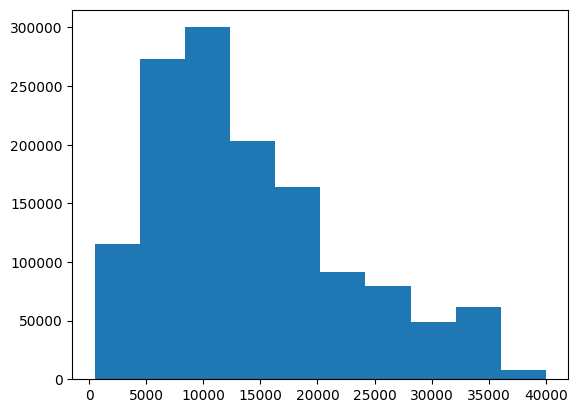

In [61]:
#sns.scatterplot(data=df, x="loan_amnt", y="default")
plt.hist(df.loan_amnt)
plt.show()

In [66]:
df[df.loan_amnt <= 1]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default


In [9]:
df['term'] = df['term'].apply(lambda x: x.replace('months', ''))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,0
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,0
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,0
4,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,0
5,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,...,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,0


In [58]:
X = df.iloc[:, :110]
Y = df['default']
X.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [59]:
X['emp_length'] = X['emp_length'].apply(lambda x: str(x).replace('10+ years', ''))
X['emp_length'] = X['emp_length'].apply(lambda x: str(x).replace('years', ''))
X['emp_length'] = X['emp_length'].apply(lambda x: str(x).replace('year', ''))
X['emp_length'] = X['emp_length'].apply(lambda x: str(x).replace('< 1', '0'))
X['emp_length'].value_counts()

       442209
2      121751
0      108065
3      107602
1       88495
5       84154
4       80558
nan     78516
6       62735
8       60704
7       59624
9       50937
Name: emp_length, dtype: int64

In [60]:
X['zip_code'].value_counts()

945xx    15005
750xx    14474
112xx    13829
606xx    12433
300xx    12124
         ...  
095xx        1
009xx        1
872xx        1
513xx        1
525xx        1
Name: zip_code, Length: 943, dtype: int64

In [61]:
X['zip_code'] = X['zip_code'].apply(lambda x: str(x).replace('xx', ''))
X['zip_code'].value_counts()

945    15005
750    14474
112    13829
606    12433
300    12124
       ...  
095        1
009        1
872        1
513        1
525        1
Name: zip_code, Length: 944, dtype: int64

In [62]:
X['pymnt_plan'].value_counts()

n    1345350
Name: pymnt_plan, dtype: int64

In [63]:
pd.get_dummies(data=df, columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 
                                                   'initial_list_status', 'application_type'])

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,annual_inc,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,leadman,10+ years,55000.0,...,0,0,0,1,0,0,0,1,1,0
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,Engineer,10+ years,65000.0,...,0,0,0,1,0,0,0,1,1,0
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,truck driver,10+ years,63000.0,...,0,0,0,1,0,0,0,1,0,1
4,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,Contract Specialist,3 years,104433.0,...,0,0,0,0,1,0,0,1,1,0
5,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,Veterinary Tecnician,4 years,34000.0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,18000.0,18000.0,60,9.49,377.95,NaN,5 years,130000.0,...,0,1,0,1,0,0,1,0,1,0
2260690,88948836,29400.0,29400.0,29400.0,60,13.99,683.94,Chief Operating Officer,9 years,180792.0,...,0,0,0,1,0,0,1,0,1,0
2260691,89996426,32000.0,32000.0,32000.0,60,14.49,752.74,Sales Manager,3 years,157000.0,...,0,0,0,0,1,0,1,0,1,0
2260692,90006534,16000.0,16000.0,16000.0,60,12.79,362.34,Manager,10+ years,150000.0,...,0,0,1,1,0,0,1,0,1,0


In [64]:
X = pd.get_dummies(data=X, columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 
                                                   'initial_list_status', 'application_type'])

In [65]:
X.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,annual_inc,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,leadman,,55000.0,...,0,0,0,1,0,0,0,1,1,0
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,Engineer,,65000.0,...,0,0,0,1,0,0,0,1,1,0
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,truck driver,,63000.0,...,0,0,0,1,0,0,0,1,0,1
4,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,Contract Specialist,3,104433.0,...,0,0,0,0,1,0,0,1,1,0
5,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,Veterinary Tecnician,4,34000.0,...,0,0,1,0,1,0,0,1,1,0


In [66]:
X = X.drop(['earliest_cr_line', 'purpose', 'title', 'url', 'loan_status', 'addr_state', 'emp_title', 'pymnt_plan'], axis=1)

In [67]:
X = X.apply(pd.to_numeric, errors='coerce') 

In [68]:
X = X.fillna(0)

In [69]:
X.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'issue_d',
       ...
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App'],
      dtype='object', length=151)

### Train and Test

In [70]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, random_state=42)

### FEATURE SELECTION

In [23]:
X.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'issue_d',
       ...
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App'],
      dtype='object', length=151)

In [349]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

In [350]:
   
for name, importance in zip(X.columns, model.feature_importances_):
    print(name, importance)


id 0.02791689479441057
loan_amnt 0.007345763711662987
funded_amnt 0.055020689688638665
funded_amnt_inv 0.005353068643793389
term 0.01692337687970403
int_rate 0.000158503235791562
installment 0.002193348860665249
emp_length 4.077757139827028e-05
annual_inc 0.00011975510360932154
issue_d 0.0
zip_code 0.00015316521191633347
dti 0.00020248068258408637
delinq_2yrs 1.7087608299214694e-05
fico_range_low 8.716680677397731e-05
fico_range_high 0.00013141681368401728
inq_last_6mths 2.2837013750187304e-05
mths_since_last_delinq 7.42262674436728e-05
open_acc 7.145593905522666e-05
pub_rec 4.5876281170510044e-05
revol_bal 0.00020735134825591495
revol_util 0.00015355420565508682
total_acc 0.0001351562004777821
out_prncp 0.0
out_prncp_inv 6.195618388187474e-06
total_pymnt 0.0004195372058264106
total_pymnt_inv 0.0002912634484186318
total_rec_prncp 0.06091051978536568
total_rec_int 0.00042764829323024443
total_rec_late_fee 0.0007699355991038917
recoveries 0.6375101482227499
collection_recovery_fee 0.0
la

In [351]:
features_i = {
  "feature": X.columns,
  "importance": model.feature_importances_
} 

In [352]:

c = pd.DataFrame.from_dict(features_i)
df_i.head()

,feature,importance
0,id,0.027988
1,loan_amnt,0.002126
2,funded_amnt,0.043443
3,funded_amnt_inv,0.022107
4,term,0.016929


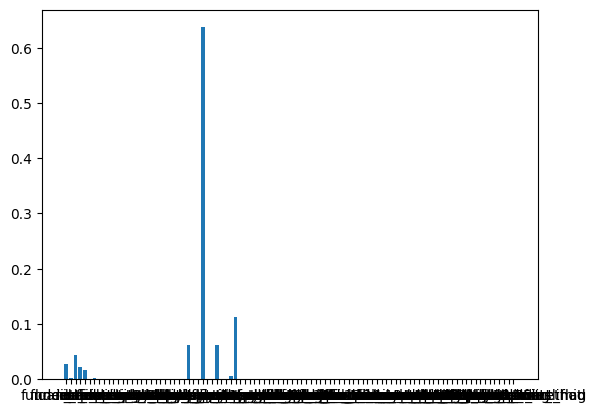

In [302]:
plt.bar(df_i.feature, df_i.importance)
plt.show()

In [354]:
df_i[df_i.importance > 0.0005]

,feature,importance
0,id,0.027988
1,loan_amnt,0.002126
2,funded_amnt,0.043443
3,funded_amnt_inv,0.022107
4,term,0.016929
6,installment,0.002213
25,total_pymnt_inv,0.000533
26,total_rec_prncp,0.061138
28,total_rec_late_fee,0.000826
29,recoveries,0.637510


### segundo metodo 

In [390]:
model =  RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)

['all_util', 'max_bal_bc', 'grade_A', 'int_rate', 'id', 'total_rec_late_fee', 'term', 'total_rec_int', 'installment', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'last_fico_range_low', 'total_rec_prncp', 'last_fico_range_high', 'collection_recovery_fee', 'recoveries']


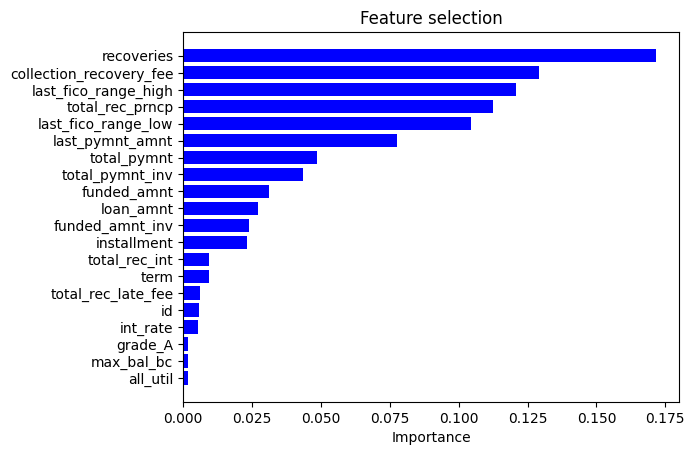

In [392]:
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  
print([features[i] for i in indices])
plt.title('Feature selection')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

### MODELAMIENTO

In [24]:
X_train = X_train[['loan_amnt',  'funded_amnt_inv', 'term', 'installment', 'total_pymnt_inv', 'total_rec_prncp',
                 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
                   'collection_recovery_fee']]

In [75]:
X_test = X_test[['loan_amnt',  'funded_amnt_inv', 'term', 'installment', 'total_pymnt_inv', 'total_rec_prncp',
                 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
                   'collection_recovery_fee']]

In [395]:
corr = df[[ 'default', 'loan_amnt',  'funded_amnt_inv', 'term', 'installment', 'total_pymnt_inv', 'total_rec_prncp',
                 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
                   'collection_recovery_fee']].corr()
corr

,default,loan_amnt,funded_amnt_inv,installment,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collection_recovery_fee
default,1.000000,0.065598,0.065440,0.051697,-0.314765,-0.438962,0.141174,0.505369,-0.347401,-0.667849,-0.575702,0.480173
loan_amnt,0.065598,1.000000,0.998567,0.953401,0.853847,0.792922,0.090043,0.191640,0.503332,0.051078,0.046824,0.183856
funded_amnt_inv,0.065440,0.998567,1.000000,0.953065,0.854958,0.792651,0.089756,0.191666,0.503975,0.050587,0.046460,0.183893
installment,0.051697,0.953401,0.953065,1.000000,0.815360,0.769364,0.098807,0.172157,0.441696,0.036949,0.036474,0.165508
total_pymnt_inv,-0.314765,0.853847,0.854958,0.815360,1.000000,0.966539,0.041988,-0.065566,0.589659,0.281717,0.242591,-0.057086
total_rec_prncp,-0.438962,0.792922,0.792651,0.769364,0.966539,1.000000,0.000892,-0.216436,0.665212,0.375602,0.315234,-0.202801
total_rec_late_fee,0.141174,0.090043,0.089756,0.098807,0.041988,0.000892,1.000000,0.098568,-0.054343,-0.124570,-0.086131,0.098525
recoveries,0.505369,0.191640,0.191666,0.172157,-0.065566,-0.216436,0.098568,1.000000,-0.171067,-0.305389,-0.238695,0.970515
last_pymnt_amnt,-0.347401,0.503332,0.503975,0.441696,0.589659,0.665212,-0.054343,-0.171067,1.000000,0.281489,0.233005,-0.162466
last_fico_range_high,-0.667849,0.051078,0.050587,0.036949,0.281717,0.375602,-0.124570,-0.305389,0.281489,1.000000,0.829519,-0.290519


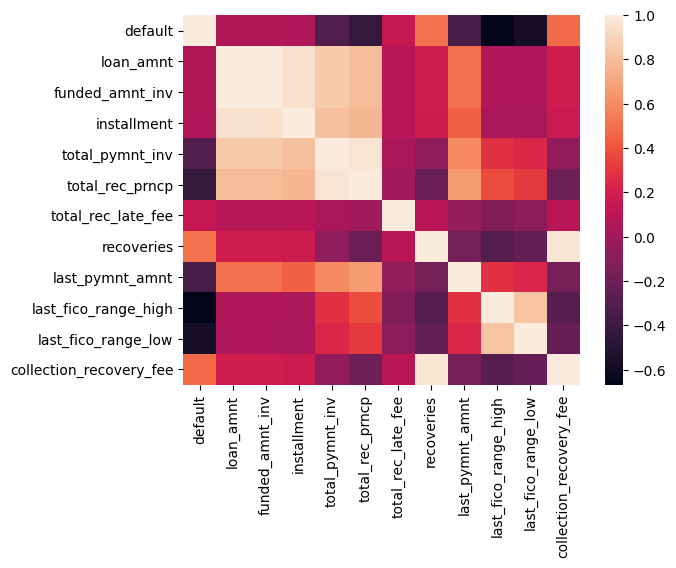

In [396]:
sns.heatmap(corr)
plt.show()

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


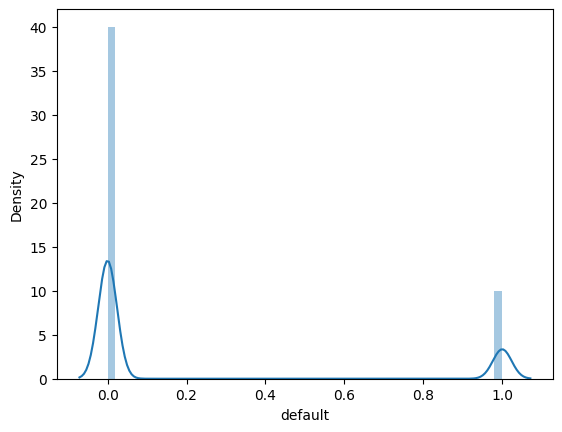

In [385]:
sns.distplot(df['default'])
plt.show()

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


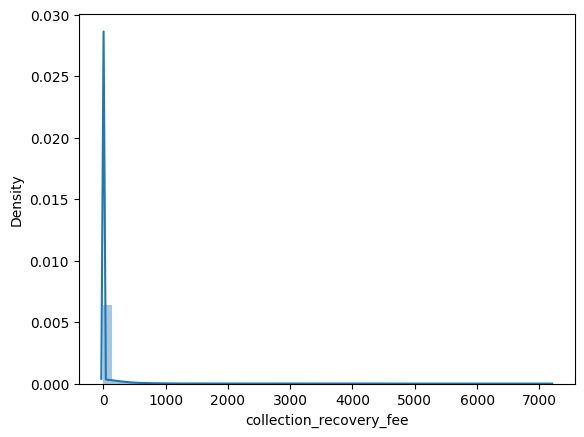

In [397]:
sns.distplot(df['collection_recovery_fee'])
plt.show()

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


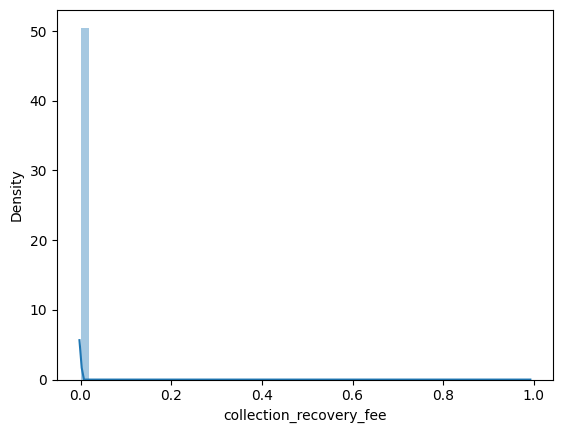

In [401]:
test = df[df.collection_recovery_fee < 1]
sns.distplot(test['collection_recovery_fee'])
plt.show()

In [429]:
test = df[df.collection_recovery_fee != 0 ]
test['collection_recovery_fee']

13          291.4020
25           66.3066
63         1000.5480
65          269.2620
68         1784.7000
             ...    
2260589     315.3636
2260603     186.9156
2260632     617.6142
2260643     325.4112
2260673    1255.8042
Name: collection_recovery_fee, Length: 176539, dtype: float64

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


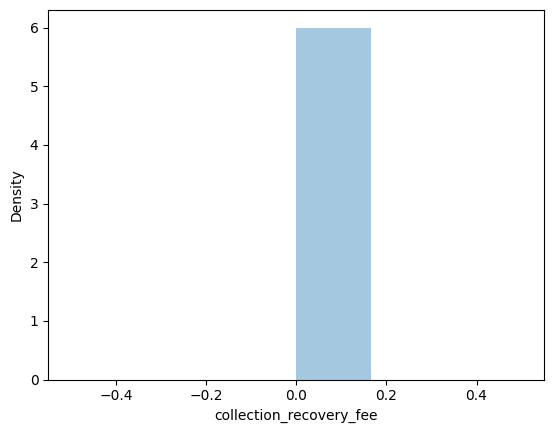

In [399]:
default = df[df.loan_status.isin(['Default'])]
sns.distplot(default['collection_recovery_fee'])
plt.show()

In [427]:
test = default[default.collection_recovery_fee <= 0.2 ]
test = 
test

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default


C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


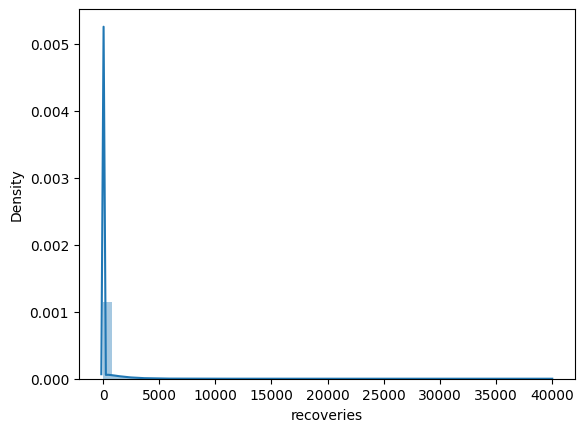

In [398]:
sns.distplot(df['recoveries'])
plt.show()

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


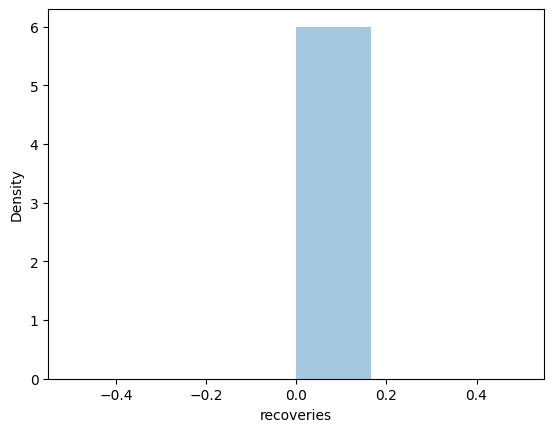

In [430]:
sns.distplot(default['recoveries'])
plt.show()

## Logistic Regression

In [432]:
lr_model = LogisticRegression(class_weight="balanced", penalty= 'l2', solver = 'saga')
lr_model.fit(X_train,y_train)

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', solver='saga')

In [442]:
y_pred = lr_model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

print("Accuracy LR: ", lr_model.score(X_test, y_test), " AUC LR: ", metrics.auc(fpr, tpr))

y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Pred")
    
y_actual = y_actual.replace([0,1],["F","P"])
y_predicho = y_predicted.replace([0,1],["F","P"])
pd.crosstab(y_actual, y_predicho, margins=True)


Accuracy LR:  0.9981863482568131  AUC LR:  0.9967211269615216


Pred,F,P,All
Actual,,,
F,47733,11709,59442
P,11986,2942,14928
All,59719,14651,74370


## Random Forest

In [439]:
clf = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)


In [441]:
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

print("accuracy RF: ", clf.score(X_test, y_test), " AUC RF: ", metrics.auc(fpr, tpr))

y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Pred")
    
y_actual = y_actual.replace([0,1],["F","P"])
y_predicho = y_predicted.replace([0,1],["F","P"])
pd.crosstab(y_actual, y_predicho, margins=True)

accuracy RF:  0.9991585845191444  AUC RF:  0.9978942310907011


Pred,F,P,All
Actual,,,
F,47750,11692,59442
P,12004,2924,14928
All,59754,14616,74370


## SMOTE

In [27]:
sm = SMOTE(random_state=42)
X_smote_train, y_smote = sm.fit_resample(X_train, y_train)
pd.Series(y_smote).value_counts()

0    807431
1    807431
Name: default, dtype: int64

## Logistic Regression y SMOTE

In [28]:
lr_model_smote = LogisticRegression(class_weight="balanced", penalty= 'l2', solver = 'saga')
lr_model_smote.fit(X_smote_train,y_smote)

C:\Users\joaqu\miniconda3\envs\isa\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', solver='saga')

In [29]:
y_pred = lr_model_smote.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

print("Accuracy LR: ", lr_model_smote.score(X_test, y_test), " AUC LR: ", metrics.auc(fpr, tpr))

y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Pred")
    
y_actual = y_actual.replace([0,1],["F","P"])
y_predicho = y_predicted.replace([0,1],["F","P"])
pd.crosstab(y_actual, y_predicho, margins=True)


Accuracy LR:  0.998251758647551  AUC LR:  0.9968124079595262


Pred,F,P,All
Actual,,,
F,47735,11707,59442
P,11987,2941,14928
All,59722,14648,74370


## SVM 

In [ ]:
model_svm = SVC(gamma='scale')
model_svm.fit(X_smote_train,y_smote) 
model_svm(C=1.0, cache_size=200, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model_svm.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

print("Accuracy LR: ", model_svm.score(X_test, y_test), " AUC LR: ", metrics.auc(fpr, tpr))

y_actual = pd.Series(y_test, name = "Actual")
y_predicted = pd.Series(y_pred, name = "Pred")
    
y_actual = y_actual.replace([0,1],["F","P"])
y_predicho = y_predicted.replace([0,1],["F","P"])
pd.crosstab(y_actual, y_predicho, margins=True)

## Modelo Final

Aunque no es el mejor modelo y se puede mejorar y optimizar hiperparametros, se escogio este modelo ya que este se entreno con data en la que se elimino el problema de desbalance de clases. 

In [31]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=efa9d4ec7a3d102927f3f19d77c22c3f67b6686ecaf8c35213de669b07b504a9
  Stored in directory: c:\users\joaqu\appdata\local\pip\cache\wheels\58\c6\8b\061bd4edc8cea2b2235758c3e50473d08499236fbfdd21e6b3
Successfully built pickle-mixin


In [32]:
final_model = lr_model_smote

In [33]:
import pickle

In [50]:
filename = 'default_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [76]:
X_test.to_csv('x_test.csv', index = False)  
y_test.to_csv('y_test.csv', index = False)  

Para importar modelo de regreso

In [37]:
import pickle 
import pandas as pd

In [77]:
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')  

In [78]:
loaded_model = pickle.load(open('default_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.998251758647551


In [79]:
y_pred = loaded_model.predict(X_test)
y_test.to_csv('y_pred.csv') 

## Conclusiones - Preguntas del proyecto 


- Most predictive feature for default: Segun los dos metodos que utilice para obtener el feature importance uno de los features mas importantes es la variable 'recoveries. Para obtener los features con los que se entreno el modelo utilice dos tecnicas de machine learning un random forest classifier y un decision tree classifier ademas de utilizar la correlacion entre las variables con la variable respuesta. 


- When collecting data, what techniques can we implemet to avoid bias? Sugeriria que se tenga la misma informacion (en lo posible y cuando aplique) para los prestamos en default como vigentes para no tener missing values unicamente en ciertos estados ademas de buscar formas automatizadas para conseguir la data en lo posible y asi reducir el error humano. 


- Metrics: Creo que todas las metricas mencionadas son valiosas y aportan informacion acerca de la eficacia del modelo, sin embargo yo diria que una de las mas importantes deberia ser el ROC AUC y Precision ya que nos muestra que tan bien el modelo esta prediciendo los positivos.


- would you say data is imbalanced: Si, la data esta bastante desbalanceada, la cantidad de defaults es mucho menor por lo que si hay un desbalance de clases. Para facilitar y mejorar las prediciones decidi tomar tambien los prestamos en mora como default, ya que la cantidad de defaults es minima comparada a los demas prestamos. Ademas se pueden utilizar varias tecnicas para corregir este tipo de problemas, para este proyecto yo utilice la tecnica SMOTE para hacer oversampling y lograr balancear las clases. 


- Prioritize features: Yo priorizaria los features de acuerdo al feature importance y de acuerdo a los features que se utilizaron para el modelamiento. 
